<a href="https://colab.research.google.com/github/ahmedekram98/W2023/blob/main/Regression_Mini-Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Mini-Project 1


***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Ekram

ID: 40-9714

Tutorial: T-08

---

Name:

ID:

Tutorial:

---

Name:

ID:

Tutorial:

---


## Dataset Description

The dataset contains historical car auction sales prices, scraped from the outside internet sources and collected in 2015.

Each row represents a sale at a used car auction. Each column is described below.

| Column       | Description                                                                                          |
| ------------ | ---------------------------------------------------------------------------------------------------- |
| year         | Car's year of production                                                                             |
| make         | Car make/brand                                                                                       |
| model        | Car model                                                                                            |
| trim         | Car's trim or grade, which specifies a car model's level of performance, features, options or extras |
| body         | Car body type (e.g. Sedan, SUV, Coupe, etc.)                                                         |
| transmission | Car transmission type. The mechanism that moves the power from the engine to the wheels.             |
| vin          | Vehicle Identification Number, a unique code to identify individual motor vehicles.                  |
| state        | The state in which the car was auctioned.                                                            |
| condition    | The condition of the cars being at the time of auction, 5 being the best score and 1 being the worst.|
| odometer     | The distance traveled by a vehicle since being manufactured, in miles                                |
| color        | Exterior color of the car                                                                            |
| interior     | Interior color of the car                                                                            |
| seller       | The seller of the car or car dealer                                                                  |
| mmr          | Manheim\* Market Report, the market estimated price of the cars. An indicator of wholesale prices.   |
| sellingprice | The price a car was sold at in auction.                                                              |
| saledate     | The date on which the car has been sold.                                                             |

\*Manheim is a company established in 1945 as a car auction company. It has grown to a very reputable company in the industry and its MMR estimate is a baseline tool for wholesale car price determination. They base their price calculations on over 10 million transaction over the past 13-month period.


## Importing Libraries \& Dataset


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

try:
    df = pd.read_csv('car_prices.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/car_prices.csv')

df.head()

<ipython-input-28-69f679858591>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)


## Data Inspection

Perform data inspection tasks here (recommended for data understanding).

In [25]:
df.dtypes
df

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2013,Hyundai,Sonata,GLS,sedan,automatic,5npeb4acxdh702805,ma,3.9,50404.0mi,black,gray,the hertz corporation,$11000,$10900,Tue Jun 02 2015 02:30:00 GMT-0700 (PDT)
1,2014,Toyota,4Runner,SR5,SUV,automatic,jtezu5jr2e5064567,fl,4.9,17846.0mi,gray,—,award auto sales and leasing inc,$28700,$29900,Wed Feb 18 2015 07:15:00 GMT-0800 (PST)
2,2012,Lexus,IS 250,Base,Sedan,automatic,jthbf5c24c5168599,fl,4.1,21122.0mi,silver,black,lexus financial services,$22200,$24200,Tue Jan 20 2015 01:30:00 GMT-0800 (PST)
3,2002,BMW,X5,4.4i,SUV,automatic,5uxfb33562lh33864,fl,1.9,145303.0mi,black,black,peddle llc,$3675,$3200,Wed Mar 04 2015 07:10:00 GMT-0800 (PST)
4,2014,Ford,E-Series Van,E-250,E-Series Van,automatic,1ftne2ew0eda31832,wa,4.9,6714.0mi,white,gray,u-haul,$22500,$22100,Wed Feb 18 2015 06:45:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46573,2013,Ford,Edge,SE,SUV,automatic,2fmdk4gc2dbc03247,va,3.5,52844.0mi,—,gray,wheels exchange llc,$15650,$17000,Wed Jan 07 2015 09:30:00 GMT-0800 (PST)
46574,2012,Infiniti,G Sedan,G37 Journey,g sedan,automatic,jn1cv6ap9cm623162,ca,4.5,23185.0mi,black,black,nissan infiniti lt,$19350,$21500,Thu Jun 18 2015 05:30:00 GMT-0700 (PDT)
46575,2013,BMW,3 Series,328i,Sedan,automatic,wba3a5c56df356614,tx,4.2,45357.0mi,white,beige,motorcars of south texas,$22200,$22000,Wed Feb 18 2015 02:00:00 GMT-0800 (PST)
46576,2013,Toyota,Camry,LE,Sedan,automatic,4t1bf1fk8du254684,ca,3.5,43376.0mi,black,beige,avis rac/san leandro,$13400,$13800,Wed Jan 14 2015 04:30:00 GMT-0800 (PST)


## Data Pre-Processing & Cleaning

_Apply any data preprocessing and/or feature engineering below. Show/output the changes to the dataset._

In [29]:
# Removing the dollar sign ($) from the ‘sellingprice’ and ‘mmr’ columns, and the ‘mi’ (miles) unit from the ‘odometer’ column.
df['sellingprice'] = df['sellingprice'].replace({'\$':''}, regex = True)
df['mmr'] = df['mmr'].replace({'\$':''}, regex = True)
df['odometer'] = df['odometer'].replace({'mi':''}, regex = True)
# Converting the ‘sellingprice’, ‘mmr’, and ‘odometer’ columns to numeric data types.
df['odometer']=pd.to_numeric(df['odometer'], errors='coerce')
df['sellingprice']=pd.to_numeric(df['sellingprice'], errors='coerce')
df['mmr']=pd.to_numeric(df['mmr'], errors='coerce')
df.dtypes
# Converting all string data in the DataFrame to lowercase.
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.lower()
# Map various car body types to a standard set of body types.
body_mapping = {
    'sedan': 'sedan',
    'g sedan' : 'sedan',
    'coupe': 'coupe',
    'g coupe': 'coupe',
    'koup': 'coupe',
    'cts coupe': 'coupe',
    'elantra coupe': 'coupe',
    'q60 coupe': 'coupe',
    'cts-v coupe': 'coupe',
    'genesis coupe': 'coupe',
    'convertible': 'convertible',
    'granturismo convertible': 'convertible',
    'g convertible': 'convertible',
    'g37 convertible': 'convertible',
    'q60 convertible': 'convertible',
    'beetle convertible': 'convertible',
    'hatchback': 'hatchback',
    'suv': 'suv',
    'minivan': 'minivan',
    'transit van': 'minivan',
    'promaster cargo van': 'minivan',
    'e-series van' : 'minivan',
    'van': 'minivan',
    'wagon': 'wagon',
    'cts wagon': 'wagon',
    'tsx sport wagon': 'wagon',
    'crew cab':'Pickup Truck',
    'supercrew':'Pickup Truck',
    'supercab':'Pickup Truck',
    'regular cab':'Pickup Truck',
    'extended cab':'Pickup Truck',
    'quad cab':'Pickup Truck',
    'double cab':'Pickup Truck',
    'crewmax cab':'Pickup Truck',
    'king cab':'Pickup Truck',
    'access cab':'Pickup Truck',
    'club cab':'Pickup Truck',
    'regular-cab':'Pickup Truck',
    'xtracab':'Pickup Truck',
    'cab plus 4':'Pickup Truck',
    'mega cab':'Pickup Truck',

}

# Apply the mapping to the 'body' column
df['body'] = df['body'].map(body_mapping)

df.isna().sum()


year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

## Exploratory Data Analysis


**Q0 (example): What is the most popular car exterior color?**


**Visualization**

<Axes: xlabel='color', ylabel='count'>

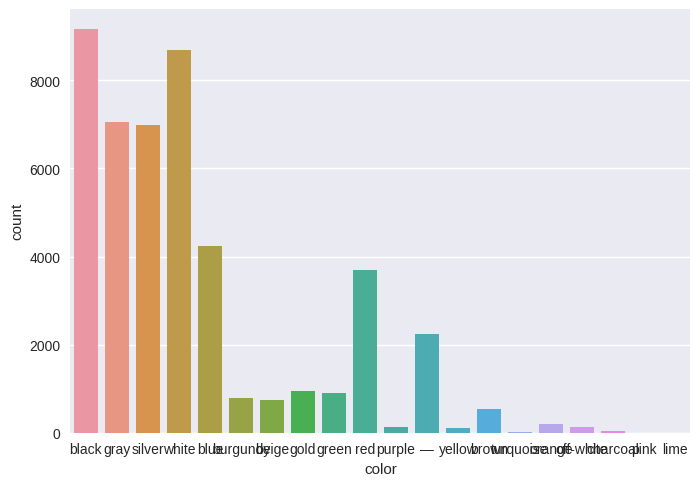

In [4]:
# Basic, minimal plot example
sns.countplot(x='color', data=df)

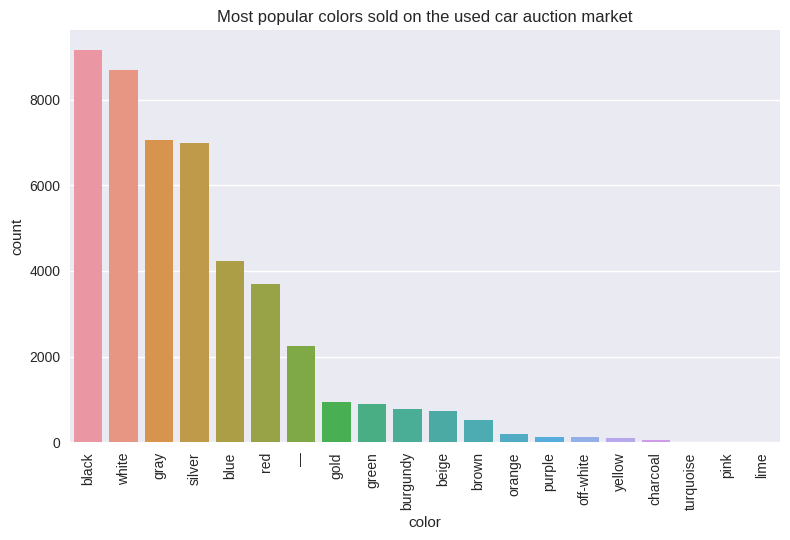

In [5]:
# Much better plot, with sorting in descending order, rotated x-axis labels for clarity, and a plot title
# Your visualizations should be neatly presented like the example below.
large_to_small = df.groupby('color').size().sort_values(ascending=False)
sns.countplot(x='color', data=df, order=large_to_small.index).set(title='Most popular colors sold on the used car auction market')
plt.xticks(rotation=90)
plt.tight_layout()

**Example note:** _you need to answer using a visualization (above) and a written/text answer (below)._

**Answer for Q0**: Black is the most popular exterior color of used cars sold in auctions, followed very closely by white.

**Q1: What are the most popular car brands? (mention at least 3)**


**Visualization**

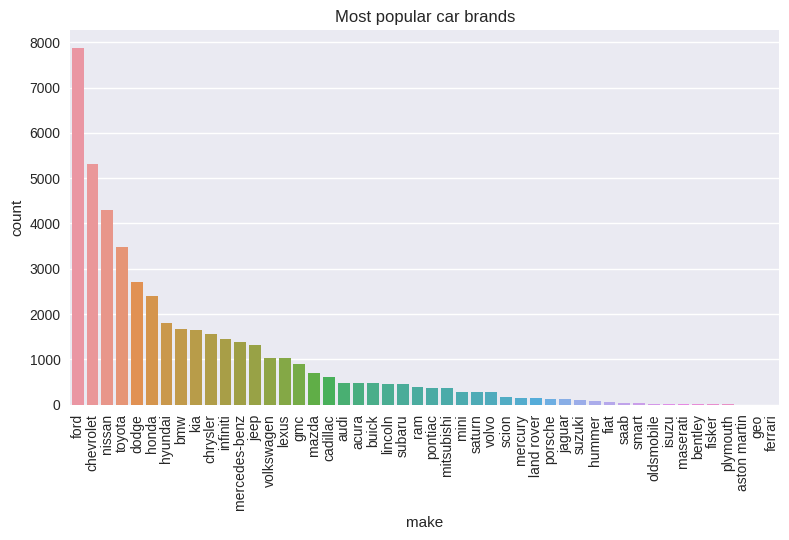

In [6]:
# Basic, minimal plot example with sorting in descending order, rotated x-axis labels for clarity, and a plot title
large_to_small = df.groupby('make').size().sort_values(ascending=False)
sns.countplot(x='make', data=df, order=large_to_small.index).set(title='Most popular car brands')
plt.xticks(rotation=90)
plt.tight_layout()

**Answer for Q1**: Ford,Chevrolet,Nissan

**Q2: Draw a bar plot showing the selling price of each of the transmission categories. Do automatic cars, on
average (mean), sell for a higher price than manual cars?**

(Use the following link for reference:
https://seaborn.pydata.org/generated/seaborn.barplot.html)


**Visualization**

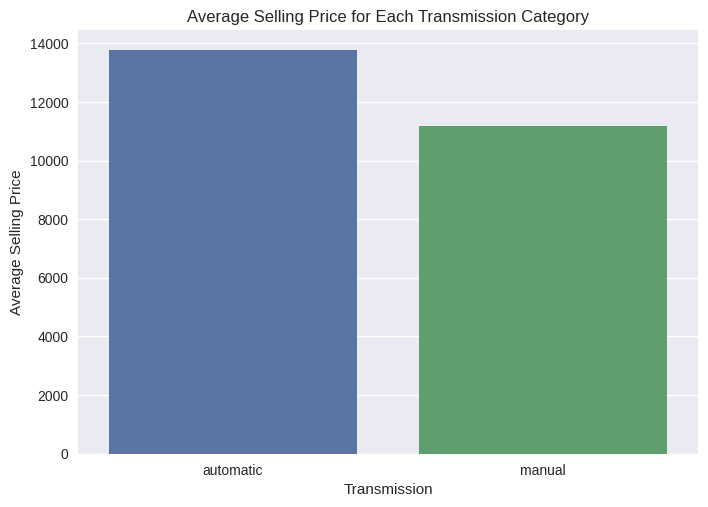

In [7]:
# Group the data by 'Transmission' and calculate the mean of 'Selling_Price'
transmission_prices = df.groupby('transmission')['sellingprice'].mean()

# Create a bar plot
sns.barplot(x=transmission_prices.index, y=transmission_prices.values)
plt.title('Average Selling Price for Each Transmission Category')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.show()

**Answer for Q2**: From the plot, we can see that automatic cars have a higher mean selling price than manual cars.

**Q3: Draw a box plot showing the distribution of the selling prices of each car make. Which car makes have the widest distribution of selling price (name two)? Which are the most expensive (name two)?**


**Visualization**

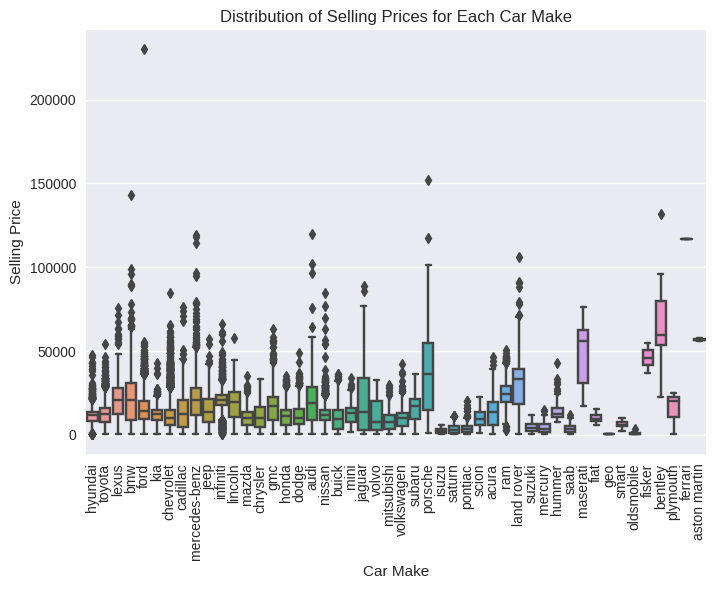

The car makes with the widest distribution of selling price are: ford and porsche.
The most expensive car makes are: ferrari and bentley.


In [8]:
# Create a box plot
sns.boxplot(x='make', y='sellingprice', data=df)
plt.title('Distribution of Selling Prices for Each Car Make')
plt.xlabel('Car Make')
plt.ylabel('Selling Price')
plt.xticks(rotation=90)
plt.show()

# Calculate the range of selling price for each car make
price_range = df.groupby('make')['sellingprice'].apply(lambda x: x.max() - x.min()).sort_values(ascending=False)

# Print out the car makes with the widest distribution of selling price
print("The car makes with the widest distribution of selling price are: {} and {}.".format(price_range.index[0], price_range.index[1]))

# Calculate the mean selling price for each car make
mean_price = df.groupby('make')['sellingprice'].mean().sort_values(ascending=False)

# Print out the most expensive car makes
print("The most expensive car makes are: {} and {}.".format(mean_price.index[0], mean_price.index[1]))

**Answer for Q3**:The car makes with the widest distribution of selling price are: ford and porsche.
The most expensive car makes are: ferrari and bentley.

**Q4: How correlated is the odometer reading or mileage with the car's sale price? (Hint: plot a line of best fit.)**

**Visualization**

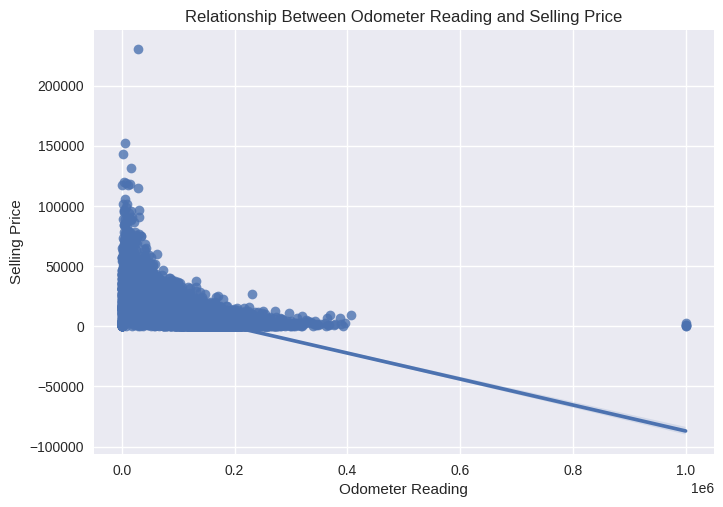

The correlation between the odometer reading and the selling price is -0.58.


In [9]:
# Create a scatter plot with a line of best fit
sns.regplot(x='odometer', y='sellingprice', data=df)
plt.title('Relationship Between Odometer Reading and Selling Price')
plt.xlabel('Odometer Reading')
plt.ylabel('Selling Price')
plt.show()

# Calculate the correlation coefficient
correlation = df['odometer'].corr(df['sellingprice'])
print("The correlation between the odometer reading and the selling price is {:.2f}.".format(correlation))

**Answer for Q4**: The correlation between the odometer reading and the selling price is -0.58.
A negative correlation indicates that as odometer increases, the Selling price decreases.

**Q5: Likewise, how correlated is the car's condition with its sale price? (Hint: plot a line of best fit.)**

**Visualization**

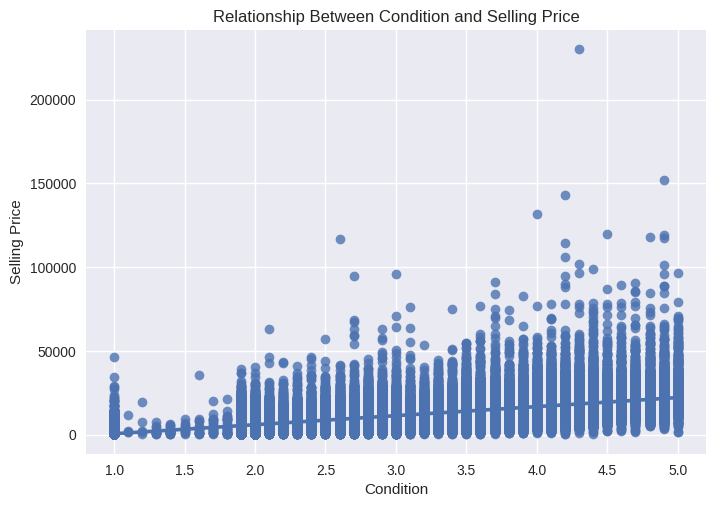

The correlation between the condition and the selling price is 0.53.


In [10]:
# Create a scatter plot with a line of best fit
sns.regplot(x='condition', y='sellingprice', data=df)
plt.title('Relationship Between Condition and Selling Price')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.show()

# Calculate the correlation coefficient
correlation = df['condition'].corr(df['sellingprice'])
print("The correlation between the condition and the selling price is {:.2f}.".format(correlation))

**Answer for Q5**: The correlation between the condition and the selling price is 0.53.
A positive correlation indicates that as condition increases, the selling price also increases.

**Q6: Draw a bar plot showing the selling price of each of the body categories. Are there differences in the average
(mean of) car price due to the car’s body type? If so, rank their order and state the most expensive and least
expensive car body type.**

**Visualization**

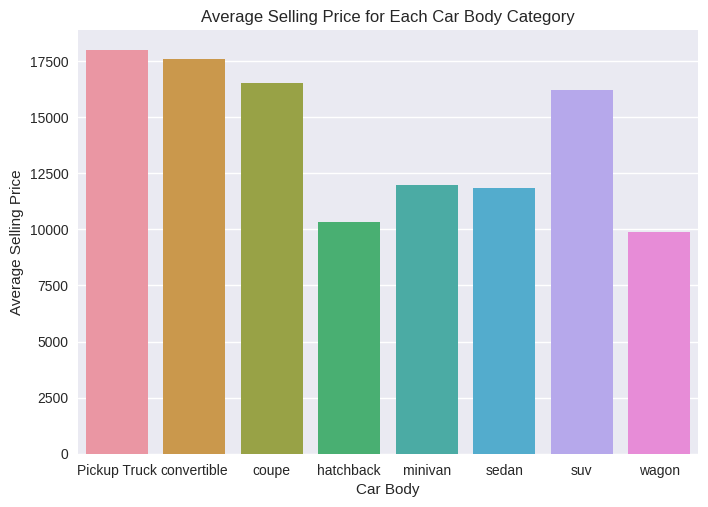

The ranking of car body types by their average selling price is:
1. Pickup Truck: 17981.77
2. convertible: 17581.56
3. coupe: 16538.92
4. suv: 16221.94
5. minivan: 11981.05
6. sedan: 11861.80
7. hatchback: 10320.64
8. wagon: 9872.68
The most expensive car body type is Pickup Truck with an average selling price of 17981.77.
The least expensive car body type is wagon with an average selling price of 9872.68.


In [11]:
# Group the data by 'Body' and calculate the mean of 'Selling_Price'
body_prices = df.groupby('body')['sellingprice'].mean()

# Create a bar plot
sns.barplot(x=body_prices.index, y=body_prices.values)
plt.title('Average Selling Price for Each Car Body Category')
plt.xlabel('Car Body')
plt.ylabel('Average Selling Price')
plt.show()

# Print out the ranking of car body types by their average selling price
ranking = body_prices.sort_values(ascending=False)
print("The ranking of car body types by their average selling price is:")
for i, (body, price) in enumerate(ranking.items()):
    print("{}. {}: {:.2f}".format(i+1, body, price))

# Print out the most expensive and least expensive car body type
print("The most expensive car body type is {} with an average selling price of {:.2f}.".format(ranking.index[0], ranking.values[0]))
print("The least expensive car body type is {} with an average selling price of {:.2f}.".format(ranking.index[-1], ranking.values[-1]))

**Answer for Q6**:The ranking of car body types by their average selling price is:
1. Pickup Truck: 17981.77
2. convertible: 17581.56
3. coupe: 16538.92
4. suv: 16221.94
5. minivan: 11981.05
6. sedan: 11861.80
7. hatchback: 10320.64
8. wagon: 9872.68

The most expensive car body type is Pickup Truck with an average selling price of 17981.77.
The least expensive car body type is wagon with an average selling price of 9872.68.

## Data Preparation for Modelling

_Apply any additional data preparation steps needed before modelling below. Show/output the changes to the dataset._

<ipython-input-33-fa6ea58dc4a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Columns in original data frame:
 ['year' 'make' 'model' 'trim' 'body' 'transmission' 'vin' 'state'
 'condition' 'odometer' 'color' 'interior' 'seller' 'mmr' 'sellingprice'
 'saledate']

Number of rows and columns in the dataset: (46578, 16)

Columns in data frame after encoding dummy variable:
 ['year' 'condition' 'odometer' 'mmr' 'sellingprice' 'make_aston martin'
 'make_audi' 'make_bentley' 'make_bmw' 'make_buick' 'make_cadillac'
 'make_chevrolet' 'make_chrysler' 'make_dodge' 'make_ferrari' 'make_fiat'
 'make_fisker' 'make_ford' 'make_geo' 'make_gmc' 'make_honda'
 'make_hummer' 'make_hyundai' 'make_infiniti' 'make_isuzu' 'make_jaguar'
 'make_jeep' 'make_kia' 'make_land rover' 'make_lexus' 'make_lincoln'
 'make_maserati' 'make_mazda' 'make_mercedes-benz' 'make_mercury'
 'make_mini' 'make_mitsubishi' 'make_nissan' 'make_oldsmobile'
 'make_plymouth' 'make_pontiac' 'make_porsche' 'make_ram' 'make_saab'
 'make_saturn' 'make_scion' 'make_smart' 'make_subaru' 'make_suzuki'
 'make_toyota' 'm

,year,condition,odometer,mmr,sellingprice,make_aston martin,make_audi,make_bentley,make_bmw,make_buick,...,make_volkswagen,make_volvo,body_convertible,body_coupe,body_hatchback,body_minivan,body_sedan,body_suv,body_wagon,transmission_manual
0,0.92,0.725,0.050403,0.075184,0.046770,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.96,0.975,0.017845,0.196438,0.129432,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.88,0.775,0.021121,0.151910,0.104633,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.48,0.225,0.145302,0.025004,0.013270,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.96,0.975,0.006713,0.153965,0.095497,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


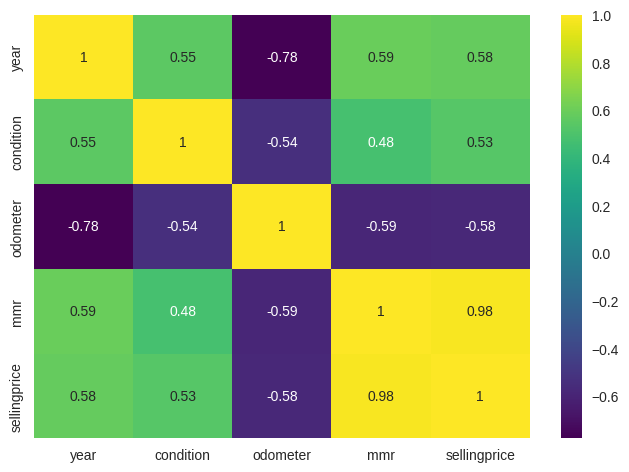

In [33]:
corr = df.corr()
corr
corr['sellingprice'].sort_values(ascending=False, key=lambda x: x.abs())
sns.heatmap(corr, cmap='viridis', annot = True);
from sklearn.model_selection import train_test_split
# Convert categorical variables into dummy/indicator variables (also known as one-hot encoding).
categorical_columns = ['make', 'body', 'transmission']
df_encode = pd.get_dummies(data=df,
                           columns=categorical_columns,
                           drop_first=True,
                           dtype='int8')
# Remove columns that are not needed for the model.
# The columns ‘model’, ‘trim’, ‘vin’, ‘state’, ‘interior’, ‘seller’, ‘saledate’, and ‘color’ are dropped. These columns dropped because they are not relevant to the target variable ‘sellingprice’
df_encode = df_encode.drop(['model','trim','vin','state','interior','seller','saledate','color'], axis=1)

# Let's have a look at the difference in data before/after encoding
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)
# The make,body,and transmission of a car could influence its price. Similarly, numerical features like year, condition, odometer reading, and mmr (likely standing for Manheim Market Report, a tool that helps users understand used-car market trends) could also affect a car’s price.
numerical_columns = ['year', 'condition', 'odometer','mmr','sellingprice']


df_encode[numerical_columns] = (

    df_encode[numerical_columns] - df_encode[numerical_columns].min()

) /(

    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)
# Split the dataset into a training set and a testing set.
x = df_encode.drop('sellingprice',axis=1) # Independent variable
y = df_encode['sellingprice'] # Dependent variable

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=23)

print('Training dataset size:', x_train.shape[0])
print('Testing dataset size:', x_test.shape[0])

df_encode.head()

## Modelling

_Apply the linear regression model below._

In [21]:
# Importing the LinearRegression class from the sklearn.linear_model module
from sklearn.linear_model import LinearRegression
# Importing the LinearRegression class from the sklearn.linear_model module
lin_reg = LinearRegression()
# Training the linear regression model on your training data & creating a DataFrame that contains the parameters of your linear regression model
lin_reg.fit(x_train, y_train);
parameter = ['theta_0'] + ['theta_{}'.format(i+1) for i in range(x.shape[1])]
columns = ['y-intersect'] + list(x.columns.values)
sk_theta = pd.Series([lin_reg.intercept_] + list(lin_reg.coef_))

parameter_df = pd.DataFrame({'parameter':parameter,'column':columns, 'theta_value': sk_theta})
parameter_df

,parameter,column,theta_value
0,theta_0,y-intersect,-0.002163
1,theta_1,year,-0.009250
2,theta_2,condition,0.017278
3,theta_3,odometer,0.007932
4,theta_4,mmr,0.617573
5,theta_5,make_aston martin,0.017570
6,theta_6,make_audi,-0.001538
7,theta_7,make_bentley,0.009057
8,theta_8,make_bmw,-0.000878
9,theta_9,make_buick,-0.001453


## Model Evaluation

_Evaluate the model you applied._

The root mean square error (RMSE) is:  0.00646752496390953
R^2 obtained is: 0.97608100243383
The mean absolute percentage error (MAPE) is:  0.1760364550853672
The median absolute error (MAE) is:  0.0030020612669989562


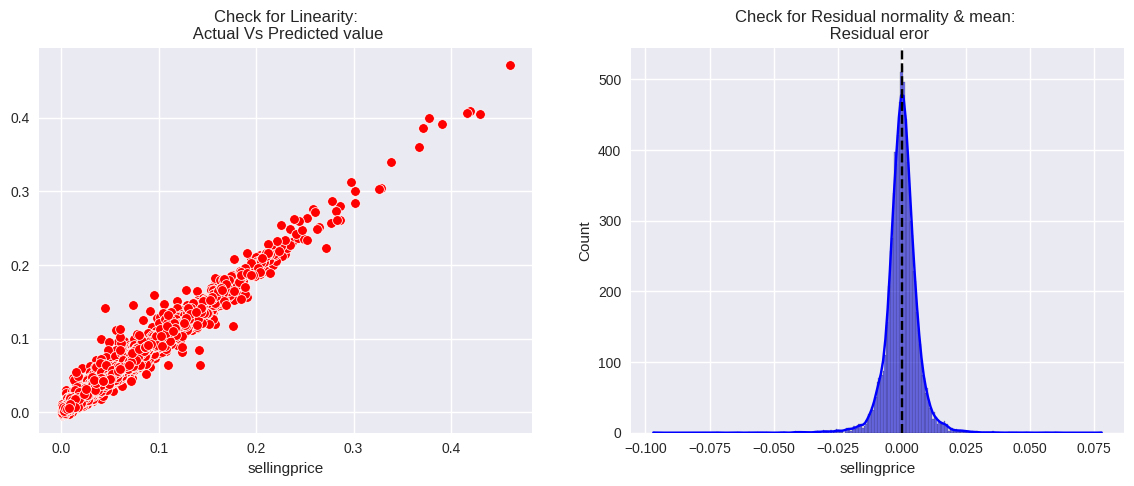

In [23]:
# sklearn regression module
y_pred = lin_reg.predict(x_test)

# Evaluation
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_pred, y_test, squared=False)

# R_square
R_square = lin_reg.score(x_test,y_test)
print('The root mean square error (RMSE) is: ', rmse)
print('R^2 obtained is:', R_square)
from sklearn.metrics import mean_absolute_percentage_error, median_absolute_error, mean_squared_log_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mae = median_absolute_error(y_test, y_pred)

# Due to the model erroneously predicting negative values for the insurance charges, MSLE cannot be used (log of negative numbers is invalid)
# Such a discovery, while accidental, provides another hint that the predictions needs to be further improved before model deployment,
# as negative values should not be output for insurance charges predictions

# msle = mean_squared_log_error(y_test, y_pred)


print('The mean absolute percentage error (MAPE) is: ', mape)
print('The median absolute error (MAE) is: ', mae)

# print('The mean squared log error (MSLE) is: ', msle)
# Checking for linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(x=y_test, y=y_pred, ax=ax, color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Checking for residual normality & mean
ax = f.add_subplot(122)
sns.histplot(x=(y_test - y_pred), ax=ax, color='b', kde=True)
ax.axvline((y_test - y_pred).mean(), color='k', linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

## Conclusion and Recommendations

Comment on the model accuracy, and thoroughly explain its value, as well as your findings from the model evaluation. State the problems (if any) and suggest possible solutions. Would you recommend this model for a used cars dealership that wants to get reliable estimates for used car prices?

**Answer**: Root Mean Square Error (RMSE): This is a measure of how spread out the residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Your model’s RMSE is 0.0065, which is relatively low, indicating that the model’s predictions are reasonably close to the actual values.

R-squared (R²): This is a statistical measure that represents the proportion of the variance for a dependent variable that’s explained by an independent variable or variables in a regression model. Your model’s R² is 0.9761, which means approximately 97.61% of the variation in the used car prices can be explained by your model. This is a high R² value, suggesting that your model fits your data well.

Mean Absolute Percentage Error (MAPE): This measures the size of the error in percentage terms. It is calculated as the average absolute percent error for each time period minus actual values divided by actual values. Your model’s MAPE is 0.176, which means on average, your predictions are off by about 17.6%.

Median Absolute Error (MAE): This is a measure of errors between paired observations expressing the same phenomenon. Your model’s MAE is 0.003, which is quite low, indicating that your model has good predictive accuracy.

Based on these metrics, your model appears to have high accuracy and fits the data well.

However, no model is perfect and there could be potential issues such as overfitting where the model might not generalize well to new data. It’s also important to note that these metrics alone cannot tell you if you’ve omitted important variables, chosen a wrong interaction term, or if you need to do more feature engineering.

Possible solutions could include cross-validation to assess how your model performs on a new set of data and using feature importance to understand which features are driving your predictions.

Given these results and with these considerations in mind, I would recommend this model for a used cars dealership wanting to get reliable estimates for used car prices. However, continuous monitoring and evaluation of the model’s performance would be necessary as market conditions change.